In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [78]:
data = pd.read_csv('18May15.csv')
data = data.dropna()

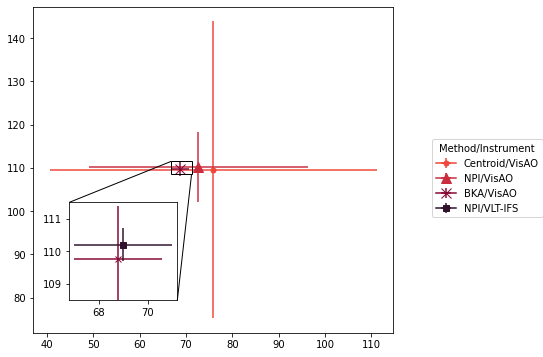

In [80]:
fig, ax1 = plt.subplots(figsize=(8,6))
colors = ['#ef473a','#cb2d3e','#870734','#30122d']
markers = ['.','^','x','s']
ms = data['method']
for i in data.index:
    if i < 3:
        color = colors[i]
        marker = markers[i]
        sep = data['sep'][i]
        seperr = data['seperr'][i]
        PA = data['PA'][i]
        PAerr = data['Paerr'][i]
        m = ms[i]
        ax1.errorbar(sep,PA,xerr=seperr,yerr=PAerr,label=m,color=color, marker=marker, markersize=10) 

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.1,0.1,0.3,0.3])
ax2.set_axes_locator(ip)
for i in data.index:
    if i > 1:
        color = colors[i]
        marker = markers[i]
        sep = data['sep'][i]
        seperr = data['seperr'][i]
        PA = data['PA'][i]
        PAerr = data['Paerr'][i]
        if i >2 :
            m = ms[i]
            ax2.errorbar(sep,PA,xerr=seperr,yerr=PAerr,label=m,color=color, marker=marker) 
        else:
            ax2.errorbar(sep,PA,xerr=seperr,yerr=PAerr,color=color, marker=marker)
ax2.set_ylim(108.5,111.5)

fig.legend(loc='center right', borderaxespad=0.1,    # Small spacing around legend box
           title="Method/Instrument"  # Title for the legend
           )
mark_inset(ax1,ax2,loc1=2,loc2=4,fc="none",ec='0.',zorder=3)
fig.subplots_adjust(right=0.75)
plt.savefig('errstory.png')